<a href="https://colab.research.google.com/github/Mahalaxmi-123/DESIGNATHON-2025-CodeStorms-PS2.5/blob/main/Copy_of_Hackthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

Importing all **packages** **bold text**

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
import tensorflow as tf


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from tensorflow.keras.models import Sequential, Model

In [8]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam

**Collecting the Data From The Csv File**

In [9]:
df=pd.read_csv("/content/ai4i2020.csv")

**Data Preprocessing**

In [10]:
df.head(20)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [11]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(columns=['UDI', 'Product ID'], inplace=True)

MinMax Scaling (Normalization): Scales values between 0 and 1. Useful when you want to preserve relationships between data points.

In [15]:
scaler=MinMaxScaler()

**Important columns**

In [16]:
selected_cols = ['Air temperature [K]', 'Process temperature [K]',
                 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
                 'Machine failure', 'Type']


In [17]:
df = df[selected_cols]

**EDA**

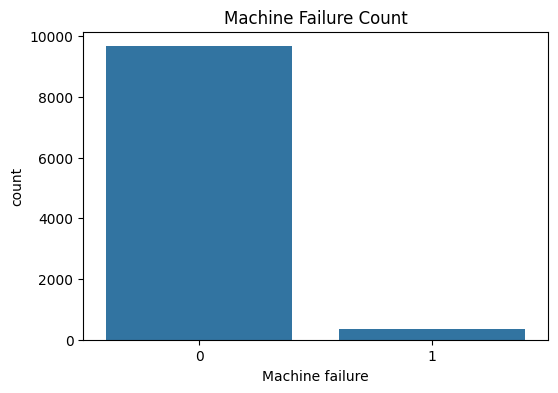

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Machine failure'])
plt.title('Machine Failure Count')
plt.show()

In [19]:
df['Machine failure'].value_counts()

,count
Machine failure,
0,9661
1,339


**Downsampling for Equillise the data**


In [20]:
from sklearn.utils import resample

majority_class = df[df['Machine failure'] == 0]
minority_class = df[df['Machine failure'] == 1]

majority_downsampled = resample(majority_class, replace=False, n_samples=1000, random_state=42)
minority_upsampled = resample(minority_class, replace=True, n_samples=1000, random_state=42)

df = pd.concat([majority_downsampled, minority_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)


In [21]:
df['Machine failure'].value_counts()

,count
Machine failure,
1,1000
0,1000


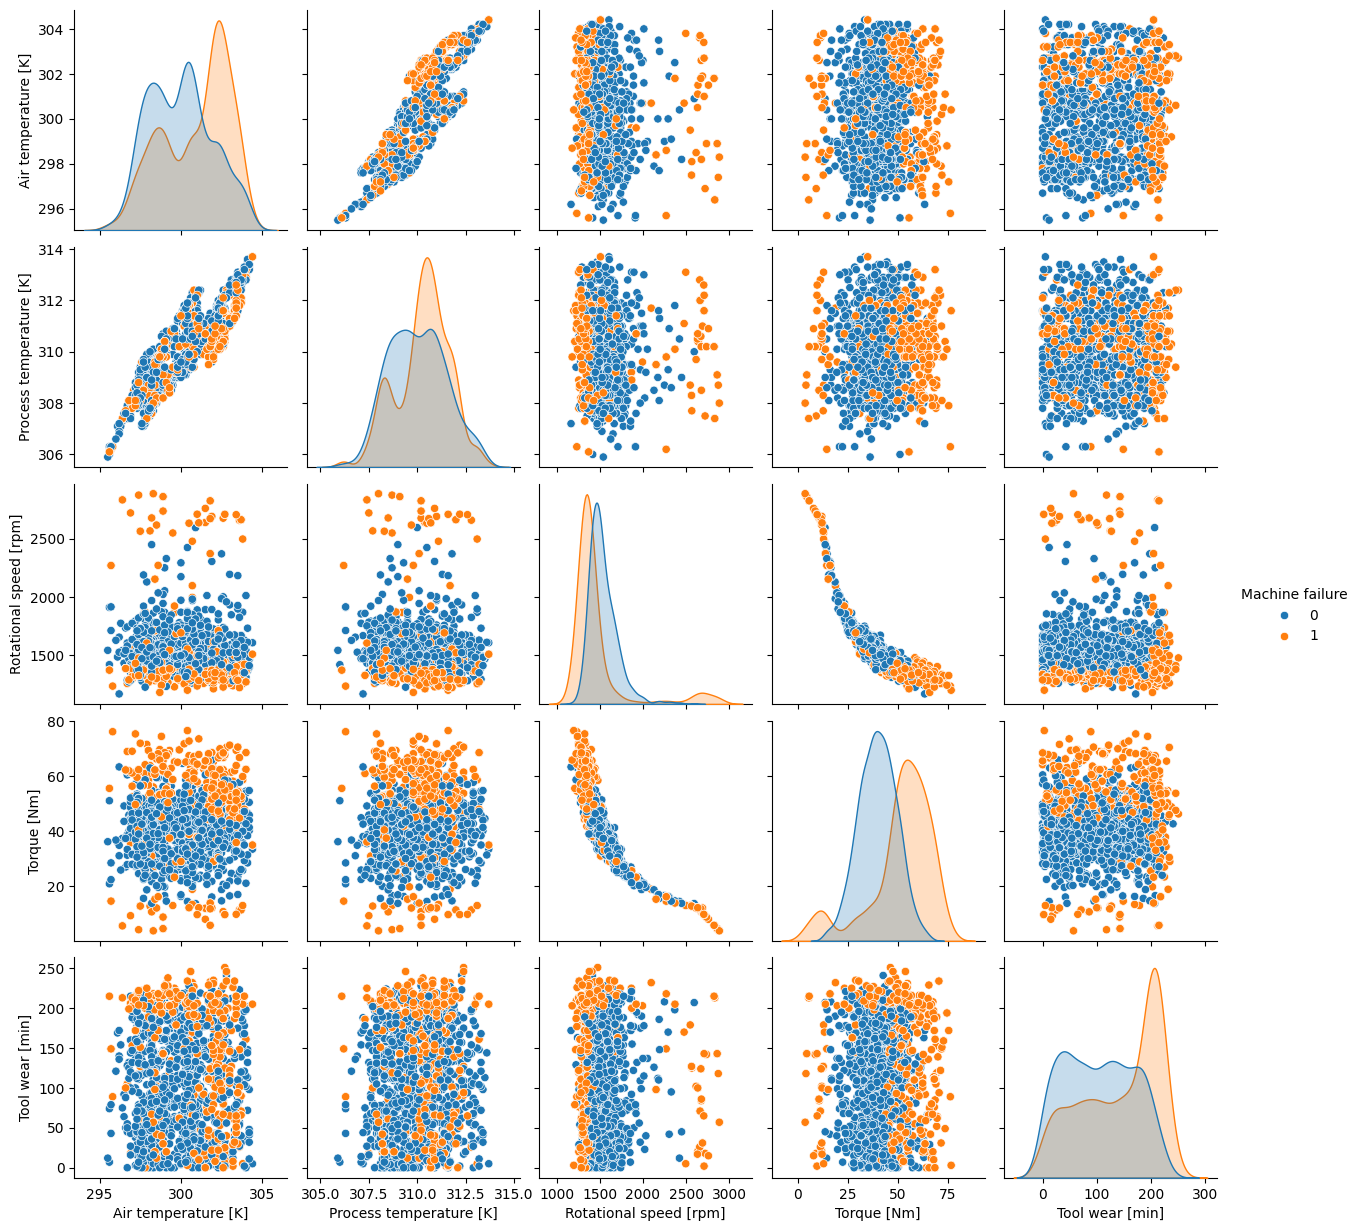

In [22]:
sns.pairplot(df, hue='Machine failure')
plt.show()


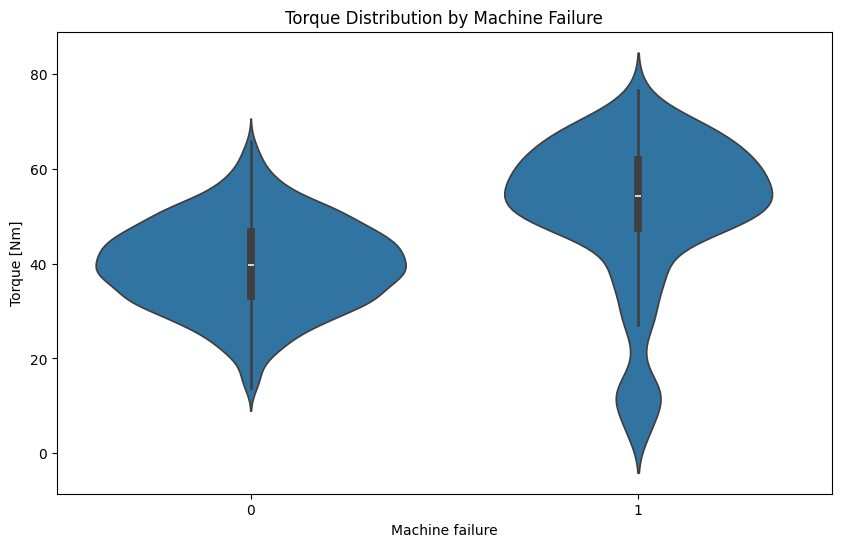

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Machine failure', y='Torque [Nm]', data=df)
plt.title('Torque Distribution by Machine Failure')
plt.show()

**Changin the type converting object to float**

In [24]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

**Extractin the features**

In [25]:
X = df.drop(columns=['Machine failure'])  # Features
y = df['Machine failure']

In [26]:
X_scaled = scaler.fit_transform(X)

# ✅ Convert back to DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Machine failure'] = y  # Add back target column



In [27]:
import pickle
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [28]:
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]

# ✅ Convert data into sequences for LSTM
sequence_length = 50
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data.iloc[i:i + seq_length].values)
    return np.array(sequences)

X_train = create_sequences(train.drop(columns=['Machine failure']), sequence_length)
X_test = create_sequences(test.drop(columns=['Machine failure']), sequence_length)

**Training A Lstm Model**

In [29]:
model = Sequential([
        LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(32, activation='relu', return_sequences=False),
        RepeatVector(sequence_length),
        LSTM(32, activation='relu', return_sequences=True),
        Dropout(0.2),
        LSTM(64, activation='relu', return_sequences=True),
        TimeDistributed(Dense(X_train.shape[2]))
    ])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 64)              │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 50, 7)               │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,455 (251.78 KB)

 Trainable params: 64,455 (251.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.2473 - val_loss: 0.1099
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.1073 - val_loss: 0.0989
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0986 - val_loss: 0.0955
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0954 - val_loss: 0.0939
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0947 - val_loss: 0.0931
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0940 - val_loss: 0.0930
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0937 - val_loss: 0.0930
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0937 - val_loss: 0.0929
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0937 - val_loss: 0.0929
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0931 - val_loss: 0.0929
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0931 - val_loss: 0.0930
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.

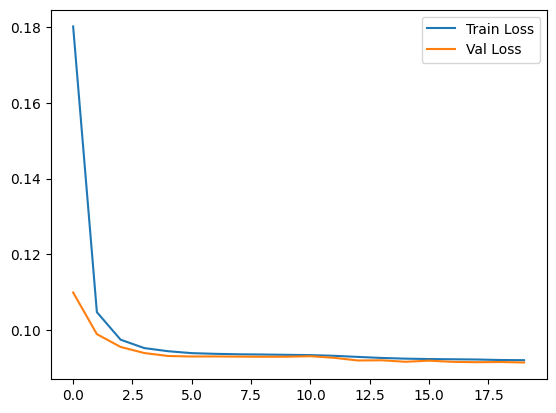

In [30]:
 # Train model
history = model.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_test, X_test))

    # Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()




11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


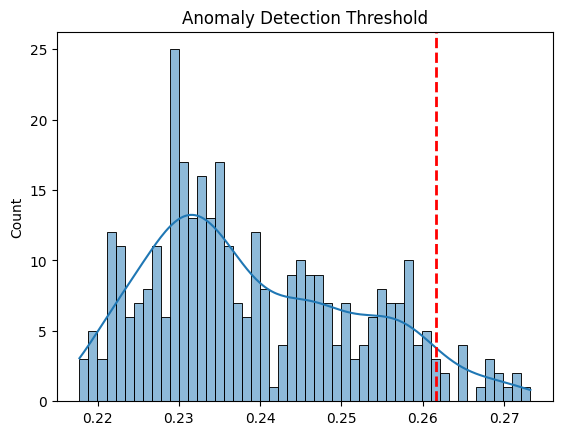

In [31]:
# Predict and calculate error
X_test_pred = model.predict(X_test)
mse = np.mean(np.abs(X_test - X_test_pred), axis=(1,2))

    # Visualize anomaly detection threshold
sns.histplot(mse, bins=50, kde=True)
plt.axvline(np.percentile(mse, 95), color='red', linestyle='dashed', linewidth=2)
plt.title('Anomaly Detection Threshold')
plt.show()

#     # Save model
# model.save('predictive_maintenance_model.h5')
# files.download('predictive_maintenance_model.h5')


In [32]:
import pickle

# Save the model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Train MAE: 0.2405
Test MAE: 0.2392


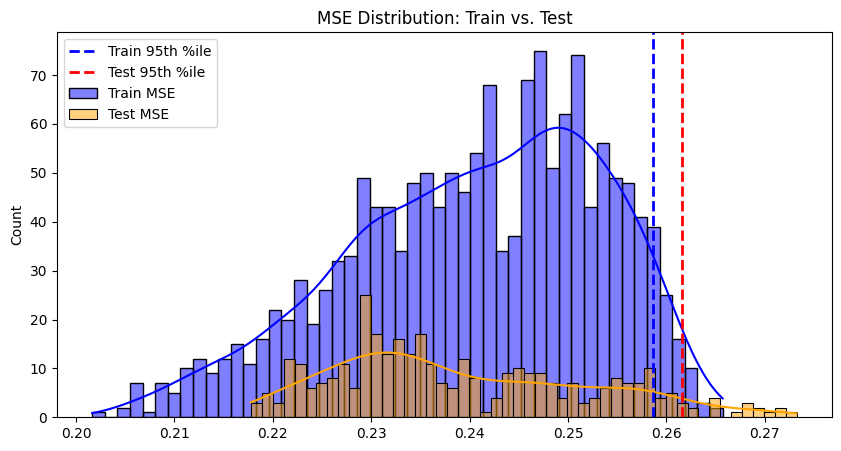

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# Predict on training & test data
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

# Calculate MSE (Reconstruction Error)
mse_train = np.mean(np.abs(X_train - X_train_pred), axis=(1, 2))
mse_test = np.mean(np.abs(X_test - X_test_pred), axis=(1, 2))

# Calculate mean absolute error
train_mae = mean_absolute_error(X_train.reshape(-1), X_train_pred.reshape(-1))
test_mae = mean_absolute_error(X_test.reshape(-1), X_test_pred.reshape(-1))

print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Plot train vs. test MSE distribution
plt.figure(figsize=(10, 5))
sns.histplot(mse_train, bins=50, kde=True, color='blue', label='Train MSE')
sns.histplot(mse_test, bins=50, kde=True, color='orange', label='Test MSE')
plt.axvline(np.percentile(mse_train, 95), color='blue', linestyle='dashed', linewidth=2, label='Train 95th %ile')
plt.axvline(np.percentile(mse_test, 95), color='red', linestyle='dashed', linewidth=2, label='Test 95th %ile')
plt.legend()
plt.title('MSE Distribution: Train vs. Test')
plt.show()

# New Section